**In this workshop we will analyze the data on 10k customers regarding their risk profile, products and demographic information using the `pandas` and `sklearn` libraries.** 
 
# Clustering

Clustering is a type of __unsupervised machine learning__, where different data points are grouped together into two or more clusters. Data points in the same cluster are more similar to each other than those in other clusters. This similarity can be measured in some specified way and the strength of similarity between data points is used to assign data points to its cluster. 

There are hard clustering and soft clustering methods. Hard clustering is when each data point belongs to a cluster completely. Soft clustering is when each data point can belong to more than one cluster with some probability. The number of clusters can be defined by the user. However, in some cases even the users do not know how many clusters should the data be grouped into. Therefore, figuring out the best number of cluster is also a part of the clustering task.  

## K-Means Clustering
* Hard clustering method.
* A centroid-based clustering method. 
* Given a cluster, a __centroid__ is its central data point. 
* Centroid can be real of imaginary. 
* In K-Means an iterative algorithm is employed to derive similarity based on the distance of that data point from the centroid of the cluster. 

Refer [here](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html) for an in-depth study of K-Means Clustering.

### A. Data Loading and Pre-processing

Let's begin by importing required libraries, methods and data. Then, we will perform some basic data pre-processing.

In [1]:
# import required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
bankcx_data = pd.read_csv('Bank_Customers.csv', sep=",", header=0, index_col=None)
pd.set_option("display.max_columns", None)
bankcx_data.head()

,CustomerID,CreditScore,Gender,Married,Age,Dependents,NumBankAccts,HasCrCard,EmergingMarketFund,RealEstate,PrivateEquity,GovtBonds,CorpBonds,ETF Tech,ETF Health,ETF Med,EstimatedSalary,Mortgage,Risk Profile,Debt,Net Assets,Portfolio Return,Diversification,BusinessOwner,Revenue,Margin,LifeInsurance,NumTransactions,LastTransactionAmt,ForeignAssets,NumProducts
0,15634602.0,619.0,Female,1.0,42.0,3.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0,101349.0,1.0,0.16,0.0,75615.0,0.1232,0.3623,0.0,65424.71,0.08,1.0,5.0,2095.3,0.39,4.0
1,15647311.0,608.0,Female,1.0,41.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,112543.0,0.0,0.48,33658.0,21131.0,0.1262,0.4050,1.0,23130.27,0.04,1.0,8.0,9955.2,0.21,1.0
2,15619304.0,502.0,Female,1.0,42.0,2.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1,113932.0,1.0,0.13,0.0,86608.0,0.0997,0.4239,0.0,19497.81,0.10,0.0,3.0,9123.1,0.00,5.0
3,15701354.0,699.0,Female,1.0,39.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,93827.0,0.0,0.21,1431.0,54767.0,0.0932,0.1576,0.0,63760.01,0.08,0.0,5.0,5973.3,0.40,5.0
4,15737888.0,850.0,Female,1.0,43.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0,79084.0,0.0,0.03,40265.0,28374.0,0.1289,0.1568,0.0,14422.97,0.04,1.0,2.0,9834.4,0.13,4.0


In [3]:
bankcx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          10000 non-null  float64
 1   CreditScore         10000 non-null  float64
 2   Gender              10000 non-null  object 
 3   Married             10000 non-null  float64
 4   Age                 10000 non-null  float64
 5   Dependents          10000 non-null  float64
 6   NumBankAccts        10000 non-null  float64
 7   HasCrCard           10000 non-null  float64
 8   EmergingMarketFund  10000 non-null  float64
 9   RealEstate          10000 non-null  float64
 10  PrivateEquity       10000 non-null  float64
 11  GovtBonds           10000 non-null  float64
 12  CorpBonds           10000 non-null  float64
 13  ETF Tech            10000 non-null  float64
 14  ETF Health          10000 non-null  float64
 15  ETF Med             10001 non-null  int64  
 16  Esti

In [4]:
# remove na from data
bankcx_data.dropna(inplace=True)

# select columns to work with
select_cols = ['Net Assets', 'EstimatedSalary', 'CreditScore', 'Debt', 'Dependents',  
               'Mortgage',  'Gender', 'Married', 'HasCrCard']
df = bankcx_data[select_cols]
df.head()

,Net Assets,EstimatedSalary,CreditScore,Debt,Dependents,Mortgage,Gender,Married,HasCrCard
0,75615.0,101349.0,619.0,0.0,3.0,1.0,Female,1.0,1.0
1,21131.0,112543.0,608.0,33658.0,2.0,0.0,Female,1.0,0.0
2,86608.0,113932.0,502.0,0.0,2.0,1.0,Female,1.0,1.0
3,54767.0,93827.0,699.0,1431.0,0.0,0.0,Female,1.0,0.0
4,28374.0,79084.0,850.0,40265.0,0.0,0.0,Female,1.0,1.0


In [5]:
# obtain a list of categorical columns
cat_cols = ['Gender', 'Married', 'HasCrCard','Mortgage']

# transform all categorical columns using one hot encoder including primary key
ohe = OneHotEncoder()
cat_data = ohe.fit_transform(df[cat_cols]).toarray() # do not include primary key
cat_data = pd.DataFrame(cat_data, columns=ohe.get_feature_names_out(cat_cols))
cat_data.index = df.index

# drop original categorical columns and combine the numeric features with the transformed ones instead
df_transformed = pd.concat([df.drop(cat_cols, axis=1), cat_data], axis=1)
df_transformed.head()

,Net Assets,EstimatedSalary,CreditScore,Debt,Dependents,Gender_Female,Gender_Male,Married_0.0,Married_1.0,HasCrCard_0.0,HasCrCard_1.0,Mortgage_0.0,Mortgage_1.0
0,75615.0,101349.0,619.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,21131.0,112543.0,608.0,33658.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,86608.0,113932.0,502.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,54767.0,93827.0,699.0,1431.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,28374.0,79084.0,850.0,40265.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [6]:
df_transformed.corr()

,Net Assets,EstimatedSalary,CreditScore,Debt,Dependents,Gender_Female,Gender_Male,Married_0.0,Married_1.0,HasCrCard_0.0,HasCrCard_1.0,Mortgage_0.0,Mortgage_1.0
Net Assets,1.000000,-0.000231,0.007089,0.011798,0.016954,0.002194,-0.002194,0.003811,-0.003811,-0.000522,0.000522,0.003818,-0.003818
EstimatedSalary,-0.000231,1.000000,-0.001384,0.006228,0.751885,0.008081,-0.008081,-0.789411,0.789411,0.009912,-0.009912,-0.012166,0.012166
CreditScore,0.007089,-0.001384,1.000000,-0.010247,-0.005009,0.002857,-0.002857,0.007989,-0.007989,0.005458,-0.005458,0.027094,-0.027094
Debt,0.011798,0.006228,-0.010247,1.000000,0.015529,-0.003869,0.003869,0.000155,-0.000155,-0.009788,0.009788,-0.004460,0.004460
Dependents,0.016954,0.751885,-0.005009,0.015529,1.000000,0.017204,-0.017204,-0.565735,0.565735,0.004661,-0.004661,-0.012344,0.012344
Gender_Female,0.002194,0.008081,0.002857,-0.003869,0.017204,1.000000,-1.000000,-0.009759,0.009759,0.005766,-0.005766,-0.106512,0.106512
Gender_Male,-0.002194,-0.008081,-0.002857,0.003869,-0.017204,-1.000000,1.000000,0.009759,-0.009759,-0.005766,0.005766,0.106512,-0.106512
Married_0.0,0.003811,-0.789411,0.007989,0.000155,-0.565735,-0.009759,0.009759,1.000000,-1.000000,-0.012501,0.012501,0.009874,-0.009874
Married_1.0,-0.003811,0.789411,-0.007989,-0.000155,0.565735,0.009759,-0.009759,-1.000000,1.000000,0.012501,-0.012501,-0.009874,0.009874
HasCrCard_0.0,-0.000522,0.009912,0.005458,-0.009788,0.004661,0.005766,-0.005766,-0.012501,0.012501,1.000000,-1.000000,-0.007138,0.007138


### B. Data Modelling

Now we can use the `.fit` framework of sklearn to implement the [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering algorithm in this data. This framework will train the model using the provided data and then obtain subsequent predictions. 

In [7]:
X = df_transformed

kmeans = KMeans(n_clusters=4, init='random', random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

In [8]:
np.unique(y_pred)

array([0, 1, 2, 3])

The parameter `n_cluster` takes the value of the number of clusters we wish to have. Here we have asked the data to be grouped into two clusters. The parameter `init` refers to the method to be used for initialization. We also specify the `random_state` parameter to replicate the result during future runs. We also have a choice of selecting either Lloyd's or Elkan's algorithm. 

The `KMeans` object has attributes such as `cluster_centers_`, `labels_`, `inertia_` and `n_iter`. 

In [9]:
centers = kmeans.cluster_centers_
centers

array([[ 5.88120898e+04,  1.75578497e+05,  6.51800410e+02,
         1.81307357e+04,  3.51311475e+00,  4.51229508e-01,
         5.48770492e-01,  4.99600361e-16,  1.00000000e+00,
         2.99590164e-01,  7.00409836e-01,  7.86475410e-01,
         2.13524590e-01],
       [ 6.21337705e+04,  1.25702812e+05,  6.48426629e+02,
         1.86848800e+04,  3.49140344e+00,  4.77808876e-01,
         5.22191124e-01,  6.10622664e-16,  1.00000000e+00,
         3.00679728e-01,  6.99320272e-01,  7.95281887e-01,
         2.04718113e-01],
       [ 6.06198909e+04,  2.54666924e+04,  6.53045945e+02,
         1.82707020e+04,  4.94206952e-01,  4.50659209e-01,
         5.49340791e-01,  1.00000000e+00, -2.77555756e-15,
         2.87654814e-01,  7.12345186e-01,  7.99840192e-01,
         2.00159808e-01],
       [ 5.78799636e+04,  7.60504765e+04,  6.48906886e+02,
         1.75436948e+04,  6.20109546e-01,  4.37793427e-01,
         5.62206573e-01,  1.79186228e-01,  8.20813772e-01,
         2.90297340e-01,  7.09702660e

In [10]:
kmeans.labels_

array([1, 1, 1, ..., 2, 3, 2])

In [11]:
kmeans.inertia_

9572086199393.164

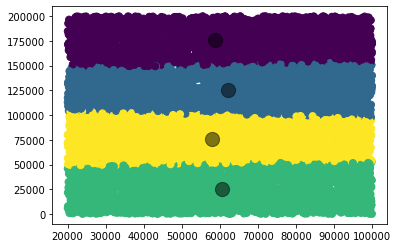

In [13]:
# relationship between Net Asset and Estimated Salary among different clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_pred, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

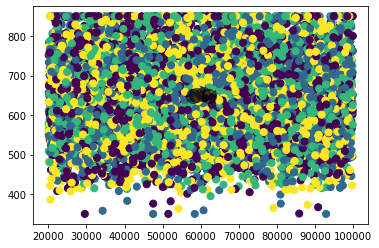

In [14]:
# relationship between Net Asset and credit score among different clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 2], c=y_pred, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 2], c='black', s=200, alpha=0.5)

#### Steps in K-Means Algorithm

1. Choose the number of clusters *k*
2. Randomly initialize *k* centroids
3. Assign each point to its closest centroid
4. Compute mean of each cluster and call it the new centroid
5. Repeat steps 3 and 4 until the centroid positions do not change


### C. Evaluation

1. __Silhouette coefficient__
* A measure of cluster cohesion and separation. 
* Quantifies how well a data point fits into its assigned cluster based on two factors:
    * How close the data point is to other points in the __same__ cluster
    * How far away the data point is from points in __other__ clusters
* Values range between -1 and 1; larger numbers indicate that samples are closer to their assigned clusters than they are to other clusters.

[`Silhouette_score` function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) is available in sklearn's `metric` module.

2. __Elbow Method__
* A technique to evaluate the best number of cluster *k*.
* Run K-Means on same data with multiple values of *k* and choose *k* that minimized the squared sum of errors (`.interia_`).

In [20]:
silhouette_score(X,y_pred)

0.3684423242481178

In [15]:
no_k = range(2, 11)

inertias = []
silhouettes = []
for i in no_k:
    print(f'Running k-means with {i} clusters')
    model = KMeans(n_clusters=i).fit(X)
    inertias.append(model.inertia_)
    pred = model.predict(X)
    silhouettes.append(silhouette_score(X,pred))

Running k-means with 2 clusters
Running k-means with 3 clusters
Running k-means with 4 clusters
Running k-means with 5 clusters
Running k-means with 6 clusters
Running k-means with 7 clusters
Running k-means with 8 clusters
Running k-means with 9 clusters
Running k-means with 10 clusters


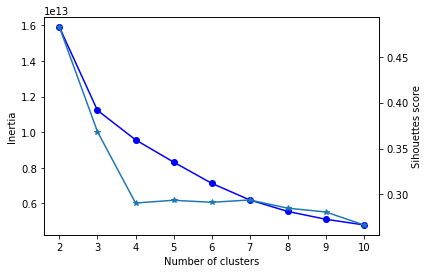

In [16]:
fig, ax1 = plt.subplots() 
ax1.plot(no_k, inertias, '-bo')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia')

ax2 = ax1.twinx()
ax2.plot(no_k, silhouettes, '-*')
ax2.set_ylabel('Sihouettes score')
plt.show()

### D. Final Model with Optimal K

In [17]:
kmeans = KMeans(n_clusters=3).fit(X)
inertia = kmeans.inertia_
y_pred = kmeans.predict(X)
silhouette = silhouette_score(X, y_pred)
centers = kmeans.cluster_centers_

In [18]:
df['cx_segment'] = y_pred
df[[i for i in df.columns if i not in cat_cols]].groupby('cx_segment').agg(['mean','std']).round(2)

C:\Users\niti.mishra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Net Assets           EstimatedSalary           CreditScore         \
                 mean       std            mean       std        mean    std   
cx_segment                                                                     
0            59887.45  23055.17        33799.96  19555.71      652.08  95.50   
1            59695.53  23081.26       100313.84  19139.12      648.01  96.90   
2            59992.14  23267.69       166922.35  19256.99      651.54  97.53   

                Debt           Dependents        
                mean       std       mean   std  
cx_segment                                       
0           18087.04  14486.58       0.50  0.50  
1           18060.73  14646.84       2.03  1.72  
2           18318.39  14788.50       3.52  1.13

In [19]:
for i in df[cat_cols]:
    print(i)
    print(df.groupby('cx_segment')[i].value_counts())
    print('-'*13)

Gender
cx_segment  Gender
0           Male      1839
            Female    1491
1           Male      1820
            Female    1558
2           Male      1798
            Female    1494
Name: Gender, dtype: int64
-------------
Married
cx_segment  Married
0           0.0        2961
            1.0         369
1           1.0        3378
2           1.0        3292
Name: Married, dtype: int64
-------------
HasCrCard
cx_segment  HasCrCard
0           1.0          2386
            0.0           944
1           1.0          2371
            0.0          1007
2           1.0          2298
            0.0           994
Name: HasCrCard, dtype: int64
-------------
Mortgage
cx_segment  Mortgage
0           0.0         2661
            1.0          669
1           0.0         2709
            1.0          669
2           0.0         2593
            1.0          699
Name: Mortgage, dtype: int64
-------------
